<a href="https://colab.research.google.com/github/Armeldjogo/NLP/blob/main/HW3_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Armel Nsiangani

Student ID#: 001-99-1988

NLP - HW3

Q1: 

Using NLTK tokenize all documents, separated by polarity, remove stop words, and list
the top 20 most frequent tokens (and their counts) for the positive reviews, and the top
20 most frequent tokens (and their counts). What kind of things do you notice are
different between the two sets?

In [1]:
# Downloading packages
%matplotlib inline
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.feature_extraction.text import CountVectorizer # Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from sklearn.naive_bayes import MultinomialNB # Bayes
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.svm import SVC # SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import sklearn.metrics 
from sklearn.metrics import confusion_matrix
import sklearn.metrics 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('punkt')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Unzip tar files 
path_to_file = "/content/review_polarity.tar.gz"
directory_to_extract_to = "/content/"
tar_file = tarfile.open(path_to_file)
tar_file.extractall(directory_to_extract_to) 
tar_file.close()

# Extracting data
import glob, os
dirName_1 = "/content/txt_sentoken/neg/"
dirName_2 = "/content/txt_sentoken/pos/"

def returnDataInArray(dirName):
  os.chdir(dirName)
  filesName = []
  for namefile in glob.glob("*.txt"):
    filesName.append(namefile)

  reviews = []
  for i in range(0,len(filesName)):
    with open(dirName + filesName[i]) as openfile:
      data = openfile.read()
      reviews.append(data) 
  return reviews,filesName

negReviews,neg_fileName = returnDataInArray(dirName_1)
posReviews,pos_fileName = returnDataInArray(dirName_2)

# Lets merge neg & pos reviews by altenating b/w the sets 
mergedReviews = []
targetReviews = []
for i in range(0,len(negReviews)):
    mergedReviews.append(negReviews[i])
    mergedReviews.append(posReviews[i])
    targetReviews.append(0)
    targetReviews.append(1)

# Create pandas dataframe
df_all = pd.DataFrame({"polarity": targetReviews,"text": mergedReviews}) # Merged reviews
df_neg = pd.DataFrame({"polarity": np.zeros(len(negReviews)),"text": negReviews}) # Negative reviews
df_pos = pd.DataFrame({"polarity": np.ones(len(posReviews)),"text": posReviews}) # Positive reviews

In [ ]:
df_pos.head()

,polarity,text
0,1.0,there seem to be two reactions to dark city . ...
1,1.0,the relaxed dude rides a roller coaster \nthe ...
2,1.0,weir is well-respected in hollywood for turnin...
3,1.0,"call me crazy , but i don't see saving private..."
4,1.0,"is it just me , or have disney films gradually..."


In [ ]:
df_neg.head()

,polarity,text
0,0.0,"an attempt at florida film noir , palmetto fai..."
1,0.0,a hotshot lawyer gets an obviously guilty chil...
2,0.0,chill factor is a carbon copy of speed with on...
3,0.0,mugshot ( director/writer/cinematographer/edit...
4,0.0,"i never understood what the clich ? "" hell on ..."


In [3]:
# Question 1
from nltk.tokenize import word_tokenize

# function to tokenize revies
def returnFilteredToken(reviews):
  stop_words = set(stopwords.words('english')) 
  filter_rev = []
  for word in reviews:
    word_t = word_tokenize(word)
    filtered_word = [w for w in word_t if not w in stop_words]
    filter_rev.append(filtered_word)  
  return filter_rev

# Let's tokenize negative, positive & merged reviews
negRev_filtered = returnFilteredToken(negReviews)
posRev_filtered = returnFilteredToken(posReviews)
mergedRev_filtered = returnFilteredToken(mergedReviews)


# Find top 20 most tokens
negRev_filt_all = []
for w in negRev_filtered:
  negRev_filt_all = negRev_filt_all + w

posRev_filt_all = []
for w in posRev_filtered:
  posRev_filt_all = posRev_filt_all + w

counter_neg = Counter(negRev_filt_all).most_common(20) 
counter_pos = Counter(posRev_filt_all).most_common(20) 

neg_word = []
neg_count = []
pos_word = []
pos_count = []

for i in range(0,len(counter_neg)):
  neg_word.append(counter_neg[i][0])
  neg_count.append(counter_neg[i][1])
  pos_word.append(counter_pos[i][0])
  pos_count.append(counter_pos[i][1])

data_20 = pd.DataFrame({"Neg. words": neg_word,"Count - Neg": neg_count,"Pos. words": pos_word,"Count - Pos": pos_count})
print(data_20)

   Neg. words  Count - Neg Pos. words  Count - Pos
0           ,        35269          ,        42448
1           .        32162          .        33714
2          ``         9123         's         9473
3          's         8655         ``         8494
4           )         5742          )         6039
5           (         5650          (         6014
6        film         4257       film         5186
7         n't         3442        one         2943
8       movie         3174        n't         2775
9         one         2637      movie         2497
10          ?         2201       like         1713
11       like         1832          ?         1570
12          :         1540          :         1502
13       even         1381      story         1231
14      would         1185       also         1200
15       good         1126       good         1190
16       time         1111       even         1175
17          !         1056       time         1171
18        get         1039     

What did you notice:
I notice that many of the 20 most common tokens are similar among negative and positive reviews. In fact, only 3/20 (Negative reviews: !,get,bad and Positive reviews: character,also,story) tokens are different in both groups. 

Q2:

Using the code from previous lectures, build 3 polarity classifiers using the following parameters. Note: just train the models.

In [ ]:
# Question 2
from numpy.random import seed
seed(12345)

# Function to return models
def createModels(classAlgName,vectorMethod,trainingSet):
  # create model
  model = make_pipeline(vectorMethod, classAlgName)
  # fit model
  model.fit(trainingSet['text'], trainingSet[['polarity']].values)
  return model


# 1-  50 - positive & 70 - negative 
XNB1p_train, XNB1p_test = train_test_split(df_pos, train_size= 0.5, test_size = 0.5)
XNB1n_train, XNB1n_test = train_test_split(df_neg, train_size= 0.7, test_size = 0.3)

NB_TF1_train = pd.concat([XNB1p_train,XNB1n_train])
model_1 = createModels(MultinomialNB(),TfidfVectorizer(),NB_TF1_train)


# 2-  70 - positive & 50 - negative
XNB2p_train, XNB2p_test = train_test_split(df_pos, train_size= 0.7, test_size = 0.3)
XNB2n_train, XNB2n_test = train_test_split(df_neg, train_size= 0.5, test_size = 0.5)

NB_TF2_train = pd.concat([XNB2p_train,XNB2n_train])
model_2 = createModels(MultinomialNB(),TfidfVectorizer(),NB_TF2_train)


# 3-  25 - positive & 25 - negative
XSVMp_train, XSVMp_test = train_test_split(df_pos, train_size= 0.25, test_size = 0.75)
XSVMn_train, XSVMn_test = train_test_split(df_neg, train_size= 0.25, test_size = 0.75)

SVM_train = pd.concat([XSVMp_train,XSVMn_train])
model_3 = createModels(MultinomialNB(),TfidfVectorizer(),SVM_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Q3:

Using the models from question 2, evaluate them on their individual rest of the dataset. 


In [ ]:
# Question 3

# 1 - 50 - positive & 30 - negative
NB_TF1_test = pd.concat([XNB1p_test,XNB1n_test])
labels_1 = model_1.predict(NB_TF1_test['text'])

print('Results Bayes & TD-IDF [50 Pos - 30 Neg]')
print('Accuracy:', sklearn.metrics.accuracy_score(NB_TF1_test[['polarity']],labels_1))
print('Precision:', sklearn.metrics.precision_score(NB_TF1_test[['polarity']],labels_1))
print('Recall:', sklearn.metrics.recall_score(NB_TF1_test[['polarity']],labels_1))
print('F1 Score:', sklearn.metrics.f1_score(labels_1, NB_TF1_test[['polarity']], average='macro'))

Results Bayes & TD-IDF [50 Pos - 30 Neg]
Accuracy: 0.3775
Precision: 1.0
Recall: 0.004
F1 Score: 0.2772081074608669


In [ ]:
# 2-  70 - positive & 50 - negative
NB_TF2_test = pd.concat([XNB2p_test,XNB2n_test])
labels_2 = model_2.predict(NB_TF2_test['text'])

print('Results Bayes & TD-IDF [70 Pos - 50 Neg]')
print('Accuracy:', sklearn.metrics.accuracy_score(NB_TF2_test[['polarity']],labels_2))
print('Precision:', sklearn.metrics.precision_score(NB_TF2_test[['polarity']],labels_2))
print('Recall:', sklearn.metrics.recall_score(NB_TF2_test[['polarity']],labels_2))
print('F1 Score:', sklearn.metrics.f1_score(labels_2, NB_TF2_test[['polarity']], average='macro'))

Results Bayes & TD-IDF [70 Pos - 50 Neg]
Accuracy: 0.375
Precision: 0.375
Recall: 1.0
F1 Score: 0.2727272727272727


In [ ]:
# 3-  75 - positive & 75 - negative
SVM_test = pd.concat([XSVMp_test,XSVMn_test])
labels_3 = model_3.predict(SVM_test['text'])

print('Results SVM & TD-IDF [75 Pos - 75 Neg]')
print('Accuracy:', sklearn.metrics.accuracy_score(SVM_test[['polarity']],labels_3))
print('Precision:', sklearn.metrics.precision_score(SVM_test[['polarity']],labels_3))
print('Recall:', sklearn.metrics.recall_score(SVM_test[['polarity']],labels_3))
print('F1 Score:', sklearn.metrics.f1_score(labels_3, SVM_test[['polarity']], average='macro'))

Results SVM & TD-IDF [75 Pos - 75 Neg]
Accuracy: 0.786
Precision: 0.8225563909774436
Recall: 0.7293333333333333
F1 Score: 0.7853106085095474


Q4:


**a)** What is the best performing model?

The best performing model is SVM + TD-IDF.

**b)** Why do you think this is the best performing model?

The reason why SVM is the best performing model is because it has the highest accuracy and f1 score, which are two of the most important metrics. Accuracy is defined as the number of correct points classified over all points in set. F1 score is the weighted average of Recall and Precision.  

**c)** How does class imbalance play in determining polarity?

In the case of class imbalance, we have a majority class (M) and minority class (m), where size(M) >> size(m). For example, size(M) = 10000 and size(m) = 50. Thus, when M and m are used by a ML model to make prediction, the classifier will tend to classify points belonging to m into M. 


**d)** Do you think either more data or a better model is a better approach for this kind of task?

Some ML models are less affected by class imbalance than others, this is for example the case for probabilistic models (Logistic regression, decision tree, etc.), unlike non-probabilistic models such as SVM where a hyperplane must separate the data. Thus, one can initially opt to use different models when faced with imbalance data. However, I believe that increasing the amount data in the minority class will be a better approach since it will allow us to better represent that class. 

Unfortunately, it is not always possible to acquire more data. In that case choosing a better models is more suitable. Other strategies include oversampling the minority class, or undersampling the majority class.

Q5:

Using NLTK and VADER, calculate the sentiment score for all documents.

In [5]:
# Question 5

# Get sentiment score - Positive documents
sentiment_score_pos = []
for word in posReviews:
  sia = SIA()
  scores = sia.polarity_scores(word)
  sentiment_score_pos.append(scores)

# Get setiment score - Negative documents
sentiment_score_neg = []
for word in negReviews:
  sia = SIA()
  scores = sia.polarity_scores(word)
  sentiment_score_neg.append(scores)

In [10]:
# Display sentiment
# Positive
df_pos['neg'] = [d['neg'] for d in sentiment_score_pos]
df_pos['neu'] = [d['neu'] for d in sentiment_score_pos]
df_pos['pos'] = [d['pos'] for d in sentiment_score_pos]
df_pos['compound'] = [d['compound'] for d in sentiment_score_pos]
print('Sentiment score - Positive')
print('---------------------------')
df_pos.head()

Sentiment score - Positive
---------------------------


,polarity,text,neg,neu,pos,compound
0,1.0,there seem to be two reactions to dark city . ...,0.078,0.761,0.162,0.9956
1,1.0,the relaxed dude rides a roller coaster \nthe ...,0.064,0.827,0.109,0.9955
2,1.0,weir is well-respected in hollywood for turnin...,0.062,0.764,0.174,0.9957
3,1.0,"call me crazy , but i don't see saving private...",0.119,0.749,0.132,0.8974
4,1.0,"is it just me , or have disney films gradually...",0.059,0.734,0.207,0.9997


In [11]:
# Negative
df_neg['neg'] = [d['neg'] for d in sentiment_score_neg]
df_neg['neu'] = [d['neu'] for d in sentiment_score_neg]
df_neg['pos'] = [d['pos'] for d in sentiment_score_neg]
df_neg['compound'] = [d['compound'] for d in sentiment_score_neg]
print('Sentiment score - Negative')
print('---------------------------')
df_neg.head()

Sentiment score - Negative
---------------------------


,polarity,text,neg,neu,pos,compound
0,0.0,"an attempt at florida film noir , palmetto fai...",0.102,0.806,0.092,-0.5308
1,0.0,a hotshot lawyer gets an obviously guilty chil...,0.153,0.730,0.116,-0.9941
2,0.0,chill factor is a carbon copy of speed with on...,0.096,0.820,0.084,-0.7614
3,0.0,mugshot ( director/writer/cinematographer/edit...,0.119,0.794,0.087,-0.9300
4,0.0,"i never understood what the clich ? "" hell on ...",0.184,0.726,0.089,-0.9926


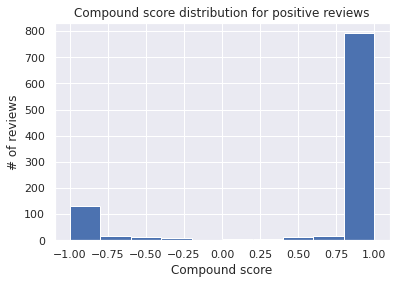

Figure 1


In [ ]:
# Plot distribution of compound score for Positive reviews
y = [d['compound'] for d in sentiment_score_pos]
plt.hist(y) 
plt.title('Compound score distribution for positive reviews')
plt.xlabel('Compound score')
plt.ylabel('# of reviews')
plt.show()
print('Figure 1')

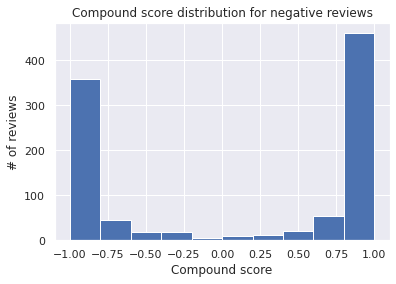

Figure 2


In [ ]:
# Plot distribution of compound score for Negative reviews
x = [d['compound'] for d in sentiment_score_neg]
plt.hist(x) 
plt.title('Compound score distribution for negative reviews')
plt.xlabel('Compound score')
plt.ylabel('# of reviews')
plt.show()
print('Figure 2')

In [ ]:
# Let's calculate thersholds
# Statistic for positive reviews
print('Statistics for positive reviews')
print('--------------------------------')
df_pos.groupby('polarity')['compound'].describe(percentiles = [.1,.15,.175,.2,.3,.5,.75,.85])

Statistics for positive reviews
--------------------------------


,count,mean,std,min,10%,15%,17.5%,20%,30%,50%,75%,85%,max
polarity,,,,,,,,,,,,,
1.0,1000.0,0.647903,0.700739,-0.9996,-0.94259,-0.589675,0.078137,0.72936,0.95479,0.99065,0.9972,0.9985,0.9999


In [ ]:
# Statistic for positive reviews
print('Statistics for negative reviews')
print('--------------------------------')
df_neg.groupby('polarity')['compound'].describe(percentiles = [.1,.15,.175,.2,.3,.5,.75,.85])

Statistics for negative reviews
--------------------------------


,count,mean,std,min,10%,15%,17.5%,20%,30%,50%,75%,85%,max
polarity,,,,,,,,,,,,,
0.0,1000.0,0.105364,0.902338,-0.9997,-0.99091,-0.98263,-0.976653,-0.97114,-0.91919,0.6637,0.9821,0.9918,0.9996


In [ ]:
# Accuracy Percentage - Positive reviews
num_pos_1 = 0
num_neg_1 = 0
for i in range(0,len(sentiment_score_pos)):
  if sentiment_score_pos[i]['compound']> -0.589675:
    num_pos_1 += 1
  else:
    num_neg_1 += 1
print('Positive reviews | Thersholds: -0.589675')
print('----------------------------------------')
print('Number of documents correctly labeled: ',num_pos_1)
print('Accuracy Percent:', num_pos_1/len(sentiment_score_pos)*100, '%')

Positive reviews | Thersholds: -0.589675
----------------------------------------
Number of documents correctly labeled:  850
Accuracy Percent: 85.0 %


In [ ]:
# Accuracy Percentage - Negative reviews
num_pos_2 = 0
num_neg_2 = 0
for i in range(0,len(sentiment_score_neg)):
  if sentiment_score_neg[i]['compound']< 0.9918:
    num_pos_2 += 1
  else:
    num_neg_2 += 1
print('Negative reviews | Thersholds: 0.9918')
print('----------------------------------------')
print('Number of documents correctly labeled: ',num_pos_2)
print('Accuracy Percent:', num_pos_2/len(sentiment_score_pos)*100, '%')

Negative reviews | Thersholds: 0.9918
----------------------------------------
Number of documents correctly labeled:  849
Accuracy Percent: 84.89999999999999 %


Calculation for thresholds:

Assumption: We consider a threshold is appropriate when it allows us to properly match at least 85% of documents to the correct labels.

a) Positive reviews:
As shown in Figure 1, most of compund scores from VADER are >0.05 (confidence level of 0.95). However, in order to get the few documents that were mislabelled in order to get ~85% properly labeled, the threshold has to be slightly below 0.05. As shown on the statistics table above, for positive reviews, a threshold of ~-0.6 (15th percentile) will allow us to properly label about 85% of documents. 


b) Negative reviews:
As shown in Figure 2, compound scores of negative reviews quite equally spread above and below 0.05. This is means that in order to properly label most documents the threshold should be shifted further to the right in order to get at least ~85% of data. As shown on the statistics table for negative reviews, a threshold of ~0.99 (85th percentile) will allow us to properly label about 85% of documents. 

Bonus: Repeat questions 2,3 and 4 removing all stopwords. 

In [ ]:
# Bonus 

# Data Frame after removing stopwords
def returnListOfString(s):
  s_new = []
  for i in s:
    l_2_str = ' '.join([str(elem) for elem in i]) 
    s_new.append(l_2_str)
  return s_new

negRev_filtered_n = returnListOfString(negRev_filtered)
posRev_filtered_n = returnListOfString(posRev_filtered)
df_neg_new = pd.DataFrame({"polarity": np.zeros(len(negRev_filtered_n)),"text": negRev_filtered_n}) # Negative reviews
df_pos_new = pd.DataFrame({"polarity": np.ones(len(posRev_filtered_n)),"text": posRev_filtered_n}) # Positive reviews



# 1-  50 - positive & 70 - negative
XNB1p_train, XNB1p_test = train_test_split(df_pos_new, train_size= 0.5, test_size = 0.5)
XNB1n_train, XNB1n_test = train_test_split(df_neg_new, train_size= 0.7, test_size = 0.3)

# Train
NB_TF1_train = pd.concat([XNB1p_train,XNB1n_train])
model_1 = createModels(MultinomialNB(),TfidfVectorizer(),NB_TF1_train)

# Test
NB_TF1_test = pd.concat([XNB1p_test,XNB1n_test])
labels_1 = model_1.predict(NB_TF1_test['text'])

print('Results Bayes & TD-IDF [50% Pos - 30% Neg]')
print('Accuracy:', sklearn.metrics.accuracy_score(NB_TF1_test[['polarity']],labels_1))
print('Precision:', sklearn.metrics.precision_score(NB_TF1_test[['polarity']],labels_1))
print('Recall:', sklearn.metrics.recall_score(NB_TF1_test[['polarity']],labels_1))
print('F1 Score:', sklearn.metrics.f1_score(labels_1, NB_TF1_test[['polarity']], average='macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results Bayes & TD-IDF [50% Pos - 30% Neg]
Accuracy: 0.39125
Precision: 1.0
Recall: 0.026
F1 Score: 0.30133009104587083


In [ ]:
# 2-  70 - positive & 50 - negative
XNB2p_train, XNB2p_test = train_test_split(df_pos_new, train_size= 0.7, test_size = 0.3)
XNB2n_train, XNB2n_test = train_test_split(df_neg_new, train_size= 0.5, test_size = 0.5)

# Train
NB_TF2_train = pd.concat([XNB2p_train,XNB2n_train])
model_2 = createModels(MultinomialNB(),TfidfVectorizer(),NB_TF2_train)

# Test
NB_TF2_test = pd.concat([XNB2p_test,XNB2n_test])
labels_2 = model_2.predict(NB_TF2_test['text'])

print('Results Bayes & TD-IDF [30% Pos - 50% Neg]')
print('Accuracy:', sklearn.metrics.accuracy_score(NB_TF2_test[['polarity']],labels_2))
print('Precision:', sklearn.metrics.precision_score(NB_TF2_test[['polarity']],labels_2))
print('Recall:', sklearn.metrics.recall_score(NB_TF2_test[['polarity']],labels_2))
print('F1 Score:', sklearn.metrics.f1_score(labels_2, NB_TF2_test[['polarity']], average='macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results Bayes & TD-IDF [30% Pos - 50% Neg]
Accuracy: 0.3825
Precision: 0.3778337531486146
Recall: 1.0
F1 Score: 0.2860807422447991


In [ ]:
# 3-  25 - positive & 25 - negative
XSVMp_train, XSVMp_test = train_test_split(df_pos_new, train_size= 0.25, test_size = 0.75)
XSVMn_train, XSVMn_test = train_test_split(df_neg_new, train_size= 0.25, test_size = 0.75)

# Train
SVM_train = pd.concat([XSVMp_train,XSVMn_train])
model_3 = createModels(MultinomialNB(),TfidfVectorizer(),SVM_train)

# Test
SVM_test = pd.concat([XSVMp_test,XSVMn_test])
labels_3 = model_3.predict(SVM_test['text'])

print('Results SVM & TD-IDF [75% Pos - 75% Neg]')
print('Accuracy:', sklearn.metrics.accuracy_score(SVM_test[['polarity']],labels_3))
print('Precision:', sklearn.metrics.precision_score(SVM_test[['polarity']],labels_3))
print('Recall:', sklearn.metrics.recall_score(SVM_test[['polarity']],labels_3))
print('F1 Score:', sklearn.metrics.f1_score(labels_3, SVM_test[['polarity']], average='macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results SVM & TD-IDF [75% Pos - 75% Neg]
Accuracy: 0.786
Precision: 0.8225563909774436
Recall: 0.7293333333333333
F1 Score: 0.7853106085095474


**a)** What is the best performing model?

The best performing model is SVM + TD-IDF.

**b)** Why do you think this is the best performing model?

SVM is the best performing model because it has the highest accuracy and F1 score.


Questions: Did this change the results in any way? Why do you think so?

Overall, the results did not dramatically change. A slight increase in metrics was observed, but this increase was not important enough (<10%). 